In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
import scipy
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import statsmodels.formula.api as sm
import copy
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import sklearn
from math import sqrt
from functools import reduce
import numpy as np
#import ee
#import geemap
import geopandas as gpd
import rioxarray as rxr
import rasterstats as rs
from rasterio.plot import show
import rasterio
import cartopy.crs as ccrs
import gdal
import os
import statsmodels.formula.api as smf


%matplotlib inline
plt.rcParams["font.family"] = "Arial"

In [2]:
points ='/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/intersect_DS_points.gpkg'
points = gpd.read_file(points)
pointsGeom = points['geometry'].explode()
points

,id,Class,ADM3_EN,geometry
0,None,Rain-fed Rice,Carles,MULTIPOINT (513897.000 1277640.000)
1,None,Rain-fed Rice,Carles,MULTIPOINT (514897.000 1277640.000)
2,None,Rain-fed Rice,Carles,MULTIPOINT (515897.000 1277640.000)
3,None,Rain-fed Rice,Carles,MULTIPOINT (512897.000 1275640.000)
4,None,Rain-fed Rice,Carles,MULTIPOINT (514897.000 1275640.000)
...,...,...,...,...
1205,None,Rain-fed Rice,San Joaquin,MULTIPOINT (399897.000 1167640.000)
1206,None,Rain-fed Rice,San Joaquin,MULTIPOINT (394897.000 1166640.000)
1207,None,Rain-fed Rice,San Joaquin,MULTIPOINT (397897.000 1163640.000)
1208,None,Rain-fed Rice,San Joaquin,MULTIPOINT (392897.000 1160640.000)


In [3]:
filesPath='/Users/delatorredm/Downloads/CH4_GEEOUTPUT'

def list_full_paths(directory):
    return [os.path.join(directory, file) for file in os.listdir(directory)]
 
filesList = list_full_paths(filesPath)
filesList.sort()

In [4]:
import fnmatch
pattern = '*NDVI*'
matching = fnmatch.filter(filesList, pattern)
range(len(matching))

range(0, 216)

In [5]:
for i in range(len(matching)):
    xds = rasterio.open(matching[i])
    raster = []
    for point in pointsGeom:
        x = point.x
        y = point.y
        row, col = xds.index(x,y)
        raster.append(xds.read(1)[row,col])
    points[os.path.splitext(os.path.basename(xds.name))[0]]=raster
points

/Users/delatorredm/miniconda3/envs/ee/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  super(GeoDataFrame, self).__setitem__(key, value)


,id,Class,ADM3_EN,geometry,NDVI_2001-01,NDVI_2001-02,NDVI_2001-03,NDVI_2001-04,NDVI_2001-05,NDVI_2001-06,...,NDVI_2018-03,NDVI_2018-04,NDVI_2018-05,NDVI_2018-06,NDVI_2018-07,NDVI_2018-08,NDVI_2018-09,NDVI_2018-10,NDVI_2018-11,NDVI_2018-12
0,None,Rain-fed Rice,Carles,MULTIPOINT (513897.000 1277640.000),0.5431,0.6255,0.5154,0.3636,0.4547,0.7077,...,0.5829,0.4402,0.3489,0.6013,0.6244,0.5672,0.6061,0.4949,0.6518,0.7038
1,None,Rain-fed Rice,Carles,MULTIPOINT (514897.000 1277640.000),0.6740,0.5439,0.6549,0.4535,0.4957,0.5048,...,0.6408,0.5323,0.4030,0.4971,0.7851,0.8725,0.7591,0.6074,0.6226,0.7581
2,None,Rain-fed Rice,Carles,MULTIPOINT (515897.000 1277640.000),0.6642,0.7100,0.6555,0.5992,0.6019,0.5397,...,0.6437,0.5579,0.4423,0.6117,0.7879,0.8342,0.6663,0.6411,0.7039,0.6994
3,None,Rain-fed Rice,Carles,MULTIPOINT (512897.000 1275640.000),0.7133,0.7440,0.6854,0.5809,0.7114,0.7784,...,0.6394,0.7347,0.5341,0.6488,0.8111,0.6657,0.7654,0.8086,0.7953,0.8574
4,None,Rain-fed Rice,Carles,MULTIPOINT (514897.000 1275640.000),0.6837,0.6921,0.7656,0.6152,0.5956,0.7191,...,0.6987,0.5953,0.5267,0.7257,0.6401,0.8444,0.8460,0.7180,0.8621,0.8136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,None,Rain-fed Rice,San Joaquin,MULTIPOINT (399897.000 1167640.000),0.7502,0.4877,0.7209,0.6436,0.8245,0.6442,...,0.6603,0.7653,0.7797,0.8757,0.3728,0.6040,0.8861,0.7831,0.8467,0.8142
1206,None,Rain-fed Rice,San Joaquin,MULTIPOINT (394897.000 1166640.000),0.7452,0.6988,0.6815,0.6689,0.8035,0.8324,...,0.7007,0.7488,0.7378,0.7680,0.8162,0.6804,0.8761,0.8649,0.8169,0.7499
1207,None,Rain-fed Rice,San Joaquin,MULTIPOINT (397897.000 1163640.000),0.7629,0.6931,0.6967,0.6900,0.7896,0.8600,...,0.6080,0.6110,0.7647,0.8661,0.8429,0.8726,0.8230,0.8238,0.7510,0.7137
1208,None,Rain-fed Rice,San Joaquin,MULTIPOINT (392897.000 1160640.000),0.7565,0.6936,0.6320,0.6233,0.7724,0.6074,...,0.8888,0.7704,0.7295,0.7872,0.7778,0.6854,0.7988,0.8253,0.8157,0.8030


<AxesSubplot:>

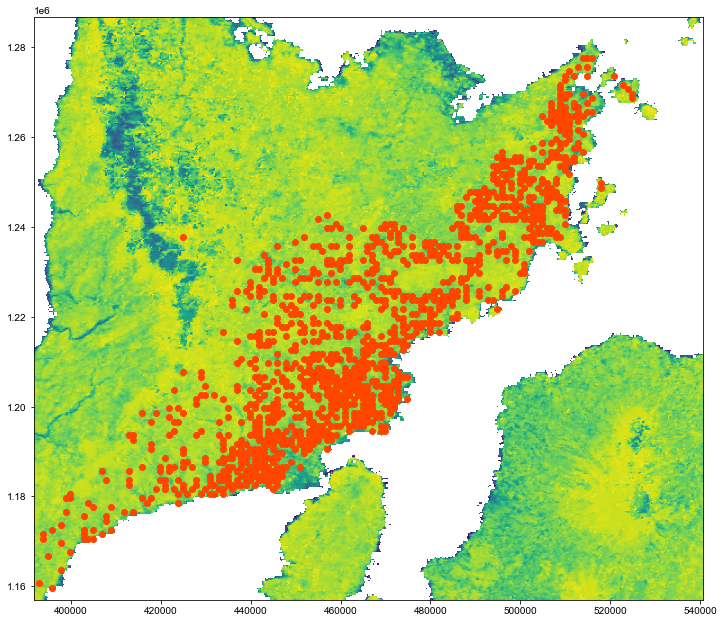

In [6]:
fig, ax = plt.subplots(figsize=(12,12))
points.plot(ax=ax, color='orangered')
show(xds, ax=ax)


In [23]:
# Get Column Namesstr.split('_')
old_colnames = pd.Series(points.drop(columns=['id','Class','ADM3_EN','geometry']).columns.values)
new_colnames = old_colnames.str.split('_', n=1, expand=True)[1]
col_rename_dict = {i:j for i,j in zip(old_colnames,new_colnames)}
newpoints = points.copy()
newpoints.rename(columns=col_rename_dict, inplace=True)

decPoints = newpoints.filter(regex='-12$')
janPoints = newpoints.filter(regex='-01$')
febPoints = newpoints.filter(regex='-02$')
julPoints = newpoints.filter(regex='-07$')
augPoints = newpoints.filter(regex='-08$')
sepPoints = newpoints.filter(regex='-09$')


dataframesList = [decPoints, janPoints, febPoints, julPoints, augPoints, sepPoints]

rdf = gpd.GeoDataFrame(pd.concat(dataframesList, axis=1, ignore_index=False))
rdf
# PARSE MONTHS_YEARS
#colNames.str.split('_', n=1, expand=True)[1].str.split('-', n=1, expand=True).rename(columns={0:'Year',1:'Month'})

,2001-12,2002-12,2003-12,2004-12,2005-12,2006-12,2007-12,2008-12,2009-12,2010-12,...,2009-09,2010-09,2011-09,2012-09,2013-09,2014-09,2015-09,2016-09,2017-09,2018-09
0,0.7964,0.8061,0.7592,0.7455,0.7741,0.6843,0.8893,0.6958,0.8277,0.8283,...,0.7056,0.6359,0.7041,0.7452,0.7510,0.6027,0.8539,0.6563,0.9094,0.6061
1,0.8312,0.6520,0.7968,0.7567,0.7461,0.6472,0.9212,0.6703,0.7725,0.7876,...,0.5715,0.6181,0.4873,0.6699,0.5628,0.7078,0.7606,0.6906,0.6216,0.7591
2,0.8003,0.7256,0.7685,0.8038,0.7316,0.6855,0.8740,0.6754,0.7774,0.7194,...,0.5219,0.6807,0.6932,0.6977,0.7231,0.8498,0.9142,0.6898,0.6017,0.6663
3,0.7603,0.8833,0.8485,0.7922,0.9086,0.8091,0.8824,0.7706,0.7945,0.8009,...,0.8105,0.8715,0.7429,0.8229,0.8389,0.7644,0.7819,0.8669,0.8367,0.7654
4,0.7314,0.8516,0.7636,0.7600,0.7152,0.7440,0.8465,0.7386,0.6530,0.7993,...,0.3750,0.6828,0.6220,0.7306,0.7432,0.7952,0.8952,0.7871,0.7052,0.8460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,0.7696,0.7508,0.7911,0.7695,0.7437,0.7866,0.8420,0.8606,0.8107,0.8218,...,0.6373,0.8373,0.7865,0.3752,0.6420,0.8631,0.9204,0.8744,0.8567,0.8861
1206,0.7272,0.7677,0.7896,0.7060,0.7627,0.7672,0.7953,0.7772,0.7471,0.7918,...,0.7603,0.8425,0.8258,0.4120,0.6891,0.8307,0.9027,0.8759,0.8549,0.8761
1207,0.7407,0.7660,0.6545,0.7711,0.6449,0.7285,0.7603,0.6565,0.7255,0.6798,...,0.7481,0.8510,0.8198,0.6059,0.6434,0.7099,0.8486,0.7615,0.7725,0.8230
1208,0.7361,0.6504,0.7525,0.7332,0.7934,0.7338,0.8167,0.6946,0.7448,0.7615,...,0.8050,0.8350,0.7984,0.5738,0.7320,0.7989,0.9091,0.9478,0.8980,0.7988


In [34]:
yearsA = [str(i) for i in list(range(2001,2018))]
yearsB = [str(i) for i in list(range(2002,2019))]

setA = [sub + '-12' for sub in yearsA]
setB = [sub + '-01' for sub in yearsB]
setC = [sub + '-02' for sub in yearsB]
setD = [sub + '-07' for sub in yearsB]
setE = [sub + '-08' for sub in yearsB]
setF = [sub + '-09' for sub in yearsB]
listOfDates = pd.DataFrame([
    setA,
    setB,
    setC,
#    setD,
#    setE,
#    setF
]).transpose()
#listOfDates = pd.DataFrame([setA,setB]).transpose()
listOfDates

,0,1,2
0,2001-12,2002-01,2002-02
1,2002-12,2003-01,2003-02
2,2003-12,2004-01,2004-02
3,2004-12,2005-01,2005-02
4,2005-12,2006-01,2006-02
5,2006-12,2007-01,2007-02
6,2007-12,2008-01,2008-02
7,2008-12,2009-01,2009-02
8,2009-12,2010-01,2010-02
9,2010-12,2011-01,2011-02


In [35]:
finalArray = []
for i in range(len(listOfDates)):
    # Assign name
    name1 = (listOfDates.iloc[i][1]).split('-')[0]
    # Get the sum
    finalArray.append(rdf.filter(items=listOfDates.iloc[i]).sum(axis=1))
    #finalArray.assign(rdf.filter(items=listOfDates.iloc[i]).sum(axis=1))

finalDF = pd.DataFrame(finalArray).transpose()
finalDF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.9754,1.9921,1.8312,1.7420,2.1756,1.6925,2.3525,2.0203,2.2719,2.2675,2.2565,1.9764,2.1233,2.1284,1.7884,2.1676,2.1794
1,2.0197,1.5640,1.9519,1.8490,2.1474,1.7247,2.2611,1.8819,1.9033,2.0658,1.9645,1.9624,2.1661,2.1980,1.8752,2.2329,2.1838
2,2.1227,1.9232,1.9351,1.9467,2.2146,1.9726,2.2951,1.9919,1.9475,1.9902,2.1974,2.0815,2.1554,2.1938,1.8836,2.3124,2.2920
3,2.1557,2.3325,2.4820,2.1521,2.6817,2.4488,2.3933,2.2516,2.0452,2.2672,2.3540,2.3862,2.4051,2.5160,2.3803,2.5009,2.5618
4,2.0160,2.0428,1.9823,2.0216,2.0139,2.1544,2.2966,2.1636,1.8438,2.2426,2.0759,2.2738,2.2137,2.2315,2.1785,2.1924,2.2441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,2.1606,2.0179,2.1590,2.0973,2.1585,2.1695,2.3569,2.3353,2.1117,2.2236,2.3400,2.4362,2.2830,2.3947,2.1054,2.3104,2.5020
1206,2.0491,1.9938,2.1237,1.9383,2.1127,2.1547,2.2380,2.2752,2.0392,2.2991,2.2159,2.2986,2.2141,2.3105,2.1179,2.4253,2.4340
1207,1.8905,1.7073,1.7475,1.6857,1.9058,1.9912,2.1706,1.9809,1.7480,2.1132,2.1813,2.1210,1.8322,2.1847,2.0032,2.1527,2.4762
1208,1.8994,1.7998,1.8847,1.9134,2.1582,1.9933,2.1873,2.0743,1.9723,2.4184,2.3152,1.9788,2.2036,2.2195,2.0954,2.3281,2.5703


In [36]:
finalDF = finalDF.rename(columns=dict(zip(range(0,17), yearsB)))
finalDF

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,1.9754,1.9921,1.8312,1.7420,2.1756,1.6925,2.3525,2.0203,2.2719,2.2675,2.2565,1.9764,2.1233,2.1284,1.7884,2.1676,2.1794
1,2.0197,1.5640,1.9519,1.8490,2.1474,1.7247,2.2611,1.8819,1.9033,2.0658,1.9645,1.9624,2.1661,2.1980,1.8752,2.2329,2.1838
2,2.1227,1.9232,1.9351,1.9467,2.2146,1.9726,2.2951,1.9919,1.9475,1.9902,2.1974,2.0815,2.1554,2.1938,1.8836,2.3124,2.2920
3,2.1557,2.3325,2.4820,2.1521,2.6817,2.4488,2.3933,2.2516,2.0452,2.2672,2.3540,2.3862,2.4051,2.5160,2.3803,2.5009,2.5618
4,2.0160,2.0428,1.9823,2.0216,2.0139,2.1544,2.2966,2.1636,1.8438,2.2426,2.0759,2.2738,2.2137,2.2315,2.1785,2.1924,2.2441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,2.1606,2.0179,2.1590,2.0973,2.1585,2.1695,2.3569,2.3353,2.1117,2.2236,2.3400,2.4362,2.2830,2.3947,2.1054,2.3104,2.5020
1206,2.0491,1.9938,2.1237,1.9383,2.1127,2.1547,2.2380,2.2752,2.0392,2.2991,2.2159,2.2986,2.2141,2.3105,2.1179,2.4253,2.4340
1207,1.8905,1.7073,1.7475,1.6857,1.9058,1.9912,2.1706,1.9809,1.7480,2.1132,2.1813,2.1210,1.8322,2.1847,2.0032,2.1527,2.4762
1208,1.8994,1.7998,1.8847,1.9134,2.1582,1.9933,2.1873,2.0743,1.9723,2.4184,2.3152,1.9788,2.2036,2.2195,2.0954,2.3281,2.5703


## CHANGE THIS SECTION FOR ECOSYSTEM TYPE

In [37]:
summedNDVI = points[['Class','ADM3_EN','geometry']].merge(finalDF, left_index=True, right_index=True)
summedNDVI

,Class,ADM3_EN,geometry,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Rain-fed Rice,Carles,MULTIPOINT (513897.000 1277640.000),1.9754,1.9921,1.8312,1.7420,2.1756,1.6925,2.3525,2.0203,2.2719,2.2675,2.2565,1.9764,2.1233,2.1284,1.7884,2.1676,2.1794
1,Rain-fed Rice,Carles,MULTIPOINT (514897.000 1277640.000),2.0197,1.5640,1.9519,1.8490,2.1474,1.7247,2.2611,1.8819,1.9033,2.0658,1.9645,1.9624,2.1661,2.1980,1.8752,2.2329,2.1838
2,Rain-fed Rice,Carles,MULTIPOINT (515897.000 1277640.000),2.1227,1.9232,1.9351,1.9467,2.2146,1.9726,2.2951,1.9919,1.9475,1.9902,2.1974,2.0815,2.1554,2.1938,1.8836,2.3124,2.2920
3,Rain-fed Rice,Carles,MULTIPOINT (512897.000 1275640.000),2.1557,2.3325,2.4820,2.1521,2.6817,2.4488,2.3933,2.2516,2.0452,2.2672,2.3540,2.3862,2.4051,2.5160,2.3803,2.5009,2.5618
4,Rain-fed Rice,Carles,MULTIPOINT (514897.000 1275640.000),2.0160,2.0428,1.9823,2.0216,2.0139,2.1544,2.2966,2.1636,1.8438,2.2426,2.0759,2.2738,2.2137,2.2315,2.1785,2.1924,2.2441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,Rain-fed Rice,San Joaquin,MULTIPOINT (399897.000 1167640.000),2.1606,2.0179,2.1590,2.0973,2.1585,2.1695,2.3569,2.3353,2.1117,2.2236,2.3400,2.4362,2.2830,2.3947,2.1054,2.3104,2.5020
1206,Rain-fed Rice,San Joaquin,MULTIPOINT (394897.000 1166640.000),2.0491,1.9938,2.1237,1.9383,2.1127,2.1547,2.2380,2.2752,2.0392,2.2991,2.2159,2.2986,2.2141,2.3105,2.1179,2.4253,2.4340
1207,Rain-fed Rice,San Joaquin,MULTIPOINT (397897.000 1163640.000),1.8905,1.7073,1.7475,1.6857,1.9058,1.9912,2.1706,1.9809,1.7480,2.1132,2.1813,2.1210,1.8322,2.1847,2.0032,2.1527,2.4762
1208,Rain-fed Rice,San Joaquin,MULTIPOINT (392897.000 1160640.000),1.8994,1.7998,1.8847,1.9134,2.1582,1.9933,2.1873,2.0743,1.9723,2.4184,2.3152,1.9788,2.2036,2.2195,2.0954,2.3281,2.5703


In [38]:
summedNDVI = summedNDVI.loc[(summedNDVI.Class=='Irrigated Rice')].reset_index(drop=True)
#summedNDVI = summedNDVI.groupby(['ADM3_EN']).mean().reset_index(drop=False)        
summedNDVI['yr1'] = summedNDVI.loc[: , '2017':'2017'].mean(axis=1)
summedNDVI['yr3'] = summedNDVI.loc[: , '2015':'2017'].mean(axis=1)
summedNDVI['yr5'] = summedNDVI.loc[: , '2013':'2017'].mean(axis=1)
summedNDVI['yr10'] = summedNDVI.loc[: , '2008':'2017'].mean(axis=1)
summedNDVI['yr15'] = summedNDVI.loc[: , '2003':'2017'].mean(axis=1)
summedNDVI

,Class,ADM3_EN,geometry,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,yr1,yr3,yr5,yr10,yr15
0,Irrigated Rice,Barotac Viejo,MULTIPOINT (480897.000 1225640.000),2.0744,2.1407,2.0576,1.9940,2.1500,2.0821,2.0130,...,2.1092,2.1164,2.2074,2.1358,2.1892,2.1358,2.153200,2.16126,2.14297,2.123607
1,Irrigated Rice,Barotac Viejo,MULTIPOINT (481897.000 1225640.000),1.8811,1.9239,2.0687,1.8567,2.1543,1.9652,2.1732,...,2.1700,2.1673,2.0760,2.3011,2.1081,2.3011,2.181467,2.15528,2.10026,2.064760
2,Irrigated Rice,Barotac Viejo,MULTIPOINT (484897.000 1225640.000),1.7797,2.0353,1.9095,1.8383,2.2439,2.0211,2.2412,...,2.0687,2.1285,2.0129,2.1859,2.2416,2.1859,2.109100,2.08166,2.12162,2.084287
3,Irrigated Rice,Barotac Viejo,MULTIPOINT (478897.000 1224640.000),1.8680,1.9374,1.8718,1.9262,2.0629,2.0191,1.9529,...,1.9840,2.0929,2.0717,2.1399,2.0075,2.1399,2.101500,2.07258,2.02502,2.004507
4,Irrigated Rice,Barotac Viejo,MULTIPOINT (479897.000 1224640.000),2.0996,2.0800,2.0288,2.0643,2.1531,2.0425,2.2093,...,2.1754,2.1493,2.1900,2.2143,2.1532,2.2143,2.184533,2.16832,2.14136,2.118820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,Irrigated Rice,Oton,MULTIPOINT (443897.000 1182640.000),1.8777,1.8172,1.9964,1.8955,2.0711,2.1920,2.1362,...,2.0607,2.1075,1.9462,2.1924,2.5044,2.1924,2.082033,2.08052,2.02687,2.016060
249,Irrigated Rice,Oton,MULTIPOINT (445897.000 1182640.000),1.7790,1.5942,1.8403,1.7831,1.9819,1.9641,2.1330,...,2.0073,1.9428,2.0670,2.0526,2.0557,2.0526,2.020800,2.00824,1.98844,1.936533
250,Irrigated Rice,Tigbauan,MULTIPOINT (435897.000 1181640.000),1.8808,1.7311,1.3694,1.6151,1.7745,1.5821,2.0673,...,1.8322,1.8160,1.6899,1.9314,2.0370,1.9314,1.812433,1.81814,1.81113,1.745567
251,Irrigated Rice,Tigbauan,MULTIPOINT (431897.000 1180640.000),2.0959,1.6918,1.6926,1.7438,1.9726,2.1011,2.1700,...,2.2241,2.0735,2.0602,2.1562,2.0930,2.1562,2.096633,2.10512,2.05296,1.982100


In [39]:
#summedNDVI.to_csv(r'/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/ndvi_all.csv')

In [40]:
actual = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed_new.csv')
#actual = actual[(actual.param == 'yield') & (actual.ecosystem == 'rf')].reset_index(drop=True)
#actual = actual[(actual.param == 'yield') & (actual.ecosystem == 'all')].reset_index(drop=True)
actual = actual[(actual.param == 'yield') & (actual.ecosystem == 'irri')].reset_index(drop=True)

actual = actual[(actual.year <= 2017) & (actual.year >= 2017)].groupby('muni').mean().reset_index(drop=False)
actual

merged = pd.merge(actual, summedNDVI, left_on='muni', right_on='ADM3_EN')
merged[['value','yr1']].corr()
#merged

,value,yr1
value,1.000000,0.473108
yr1,0.473108,1.000000


# RAINFED

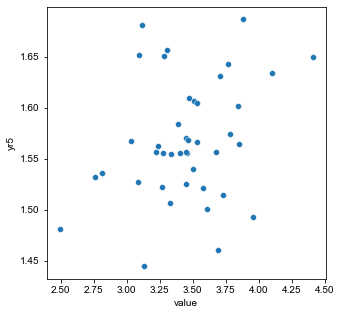

In [14]:
summedNDVI = points[['Class','ADM3_EN','geometry']].merge(finalDF, left_index=True, right_index=True)
summedNDVI = summedNDVI.loc[(summedNDVI.Class=='Rain-fed Rice')].reset_index(drop=True)
summedNDVI = summedNDVI.groupby(['ADM3_EN']).mean().reset_index(drop=False)        

summedNDVI['yr5'] = summedNDVI.loc[: , '2013':'2017'].mean(axis=1)

actual = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed_new.csv')
actual = actual[(actual.param == 'yield') & (actual.ecosystem == 'rf')].reset_index(drop=True)
actual = actual[(actual.year <= 2017) & (actual.year >= 2013)].groupby('muni').mean().reset_index(drop=False)

merged = pd.merge(actual, summedNDVI, left_on='muni', right_on='ADM3_EN')
df = merged[['value','yr5']]
#df['logval'] = np.log(df['value'])
#df['logndvi'] = np.log(df['yr5'])
#df['logndvi'] = np.log(df['yr5'])
fig, ax = plt.subplots(figsize=(5,5))
fig = sns.scatterplot(x="value", y="yr5", data=df)

# IRRIGATED

/var/folders/ry/km0p9rw12zq4h59s7r28sm440000gn/T/ipykernel_17155/2267778690.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['logval'] = np.log(df['value'])
/var/folders/ry/km0p9rw12zq4h59s7r28sm440000gn/T/ipykernel_17155/2267778690.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['expndvi'] = np.exp(df['yr5'])
/var/folders/ry/km0p9rw12zq4h59s7r28sm440000gn/T/ipykernel_17155/2267778690.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

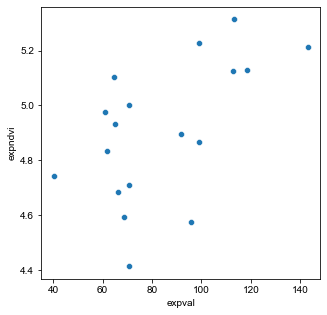

In [23]:
summedNDVI = points[['Class','ADM3_EN','geometry']].merge(finalDF, left_index=True, right_index=True)
summedNDVI = summedNDVI.loc[(summedNDVI.Class=='Irrigated Rice')].reset_index(drop=True)
summedNDVI = summedNDVI.groupby(['ADM3_EN']).mean().reset_index(drop=False)        

summedNDVI['yr5'] = summedNDVI.loc[: , '2013':'2017'].mean(axis=1)

actual = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed_new.csv')
actual = actual[(actual.param == 'yield') & (actual.ecosystem == 'irri')].reset_index(drop=True)
actual = actual[(actual.year <= 2017) & (actual.year >= 2013)].groupby('muni').mean().reset_index(drop=False)

merged = pd.merge(actual, summedNDVI, left_on='muni', right_on='ADM3_EN')
df = merged[['value','yr5']]
df['logval'] = np.log(df['value'])
#df['logndvi'] = np.log(df['yr5'])
#df['logndvi'] = np.log(df['yr5'])
df['expndvi'] = np.exp(df['yr5'])
df['expval'] = np.exp(df['value'])


fig, ax = plt.subplots(figsize=(5,5))
fig = sns.scatterplot(x="expval", y="expndvi", data=df)

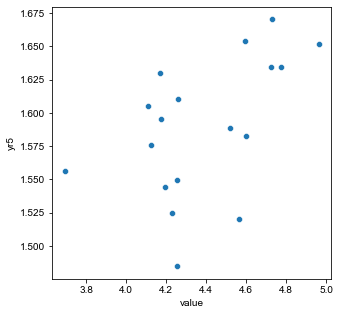

In [24]:
fig, ax = plt.subplots(figsize=(5,5))
fig = sns.scatterplot(x="value", y="yr5", data=df)

In [30]:
formula = 'expval ~ expndvi'
results = smf.ols(formula = formula, 
                 missing='drop',
                 data=df).fit()
print(results.summary())
print(pd.DataFrame(results.params).round(decimals=4).transpose())


                            OLS Regression Results                            
Dep. Variable:                 expval   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     7.506
Date:                Tue, 15 Mar 2022   Prob (F-statistic):             0.0145
Time:                        16:21:05   Log-Likelihood:                -80.428
No. Observations:                  18   AIC:                             164.9
Df Residuals:                      16   BIC:                             166.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -204.2388    105.350     -1.939      0.0

/Users/delatorredm/miniconda3/envs/ee/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# ALL


/var/folders/ry/km0p9rw12zq4h59s7r28sm440000gn/T/ipykernel_17155/4205779423.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['logval'] = np.log(df['value'])
/var/folders/ry/km0p9rw12zq4h59s7r28sm440000gn/T/ipykernel_17155/4205779423.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['expndvi'] = np.exp(df['yr5'])
/var/folders/ry/km0p9rw12zq4h59s7r28sm440000gn/T/ipykernel_17155/4205779423.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

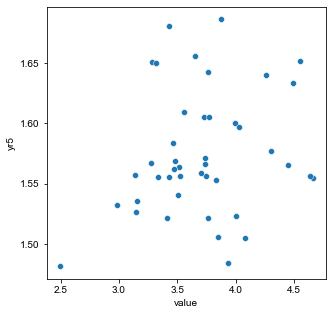

In [31]:
summedNDVI = points[['Class','ADM3_EN','geometry']].merge(finalDF, left_index=True, right_index=True)
#summedNDVI = summedNDVI.loc[(summedNDVI.Class=='Rain-fed Rice')].reset_index(drop=True)
summedNDVI = summedNDVI.groupby(['ADM3_EN']).mean().reset_index(drop=False)        

summedNDVI['yr5'] = summedNDVI.loc[: , '2013':'2017'].mean(axis=1)

actual = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed_new.csv')
actual = actual[(actual.param == 'yield') & (actual.ecosystem == 'all')].reset_index(drop=True)
actual = actual[(actual.year <= 2017) & (actual.year >= 2013)].groupby('muni').mean().reset_index(drop=False)

merged = pd.merge(actual, summedNDVI, left_on='muni', right_on='ADM3_EN')
df = merged[['value','yr5']]
df['logval'] = np.log(df['value'])
#df['logndvi'] = np.log(df['yr5'])
#df['logndvi'] = np.log(df['yr5'])
df['expndvi'] = np.exp(df['yr5'])
df['expval'] = np.exp(df['value'])

fig, ax = plt.subplots(figsize=(5,5))
fig = sns.scatterplot(x="value", y="yr5", data=df)

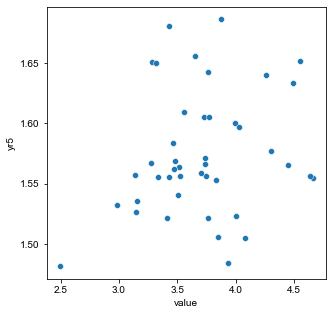

In [33]:
fig, ax = plt.subplots(figsize=(5,5))
fig = sns.scatterplot(x="value", y="yr5", data=df)

In [35]:
formula = 'value ~ yr5'
results = smf.ols(formula = formula, 
                 missing='drop',
                 data=df).fit()
print(results.summary())
print(pd.DataFrame(results.params).round(decimals=4).transpose())


                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     1.990
Date:                Tue, 15 Mar 2022   Prob (F-statistic):              0.166
Time:                        16:21:59   Log-Likelihood:                -26.416
No. Observations:                  43   AIC:                             56.83
Df Residuals:                      41   BIC:                             60.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6398      2.177      0.294      0.7